# Introduction to Dataset:

According to the documentation of the AI4I 2020 Predictive Maintenance Dataset

* Type: consisting of a letter L, M, or H for low, medium and high as product quality variants.
* air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K.
* process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
* rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise.
* torque [Nm]: torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values.
* tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.
* machine failure: whether the machine has failed in this particular datapoint for any of the following failure modes are true.
The machine failure consists of five independent failure modes

* tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 ~ 240 mins.
* heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air and process temperature is below 8.6 K and the rotational speed is below 1380 rpm.
* power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails.
* overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain.
* random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters.
If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1.

* Importing libraries:

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# turn off warnings
import warnings
warnings.filterwarnings('ignore')

* Let's import the data and take a look at the first few rows:

In [21]:
train_data = pd.read_csv('data/train.csv')
train_data.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


* General information about the data:

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

* Checking for missing values:

In [23]:
train_data.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

We have a pretty clean dataset.

* Checking for duplicates:

In [24]:
# check for duplicates
train_data.duplicated().sum()

0

* Statistical summary of the data:

In [25]:
train_data.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


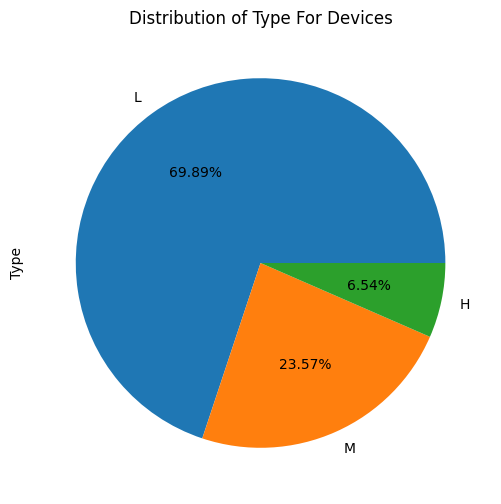

In [26]:
# create a pie chart to visualize the distribution of the Type variable
# annotate the pie chart with the percentage of each category
train_data['Type'].value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(6, 6))
plt.title('Distribution of Type For Devices')
plt.show()

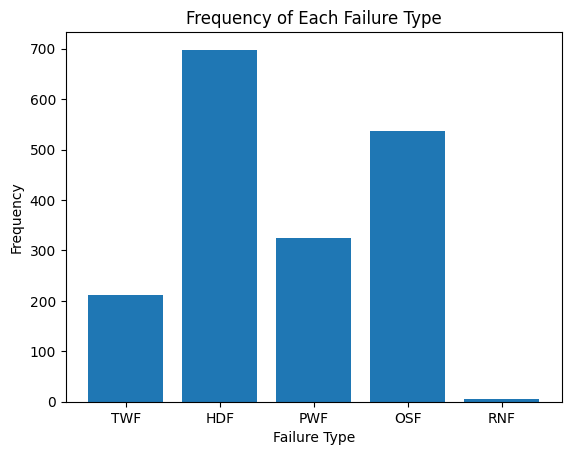

In [27]:
# plot the frequency of each failure type : TWF, HDF, PWF, OSF, RNF
failed = train_data[train_data['Machine failure'] == 1]
freq = {x: failed[x].sum() for x in ["TWF","HDF","PWF","OSF","RNF"]}
plt.bar(freq.keys(), freq.values())
plt.title('Frequency of Each Failure Type')
plt.xlabel('Failure Type')
plt.ylabel('Frequency')
plt.show()

<Axes: >

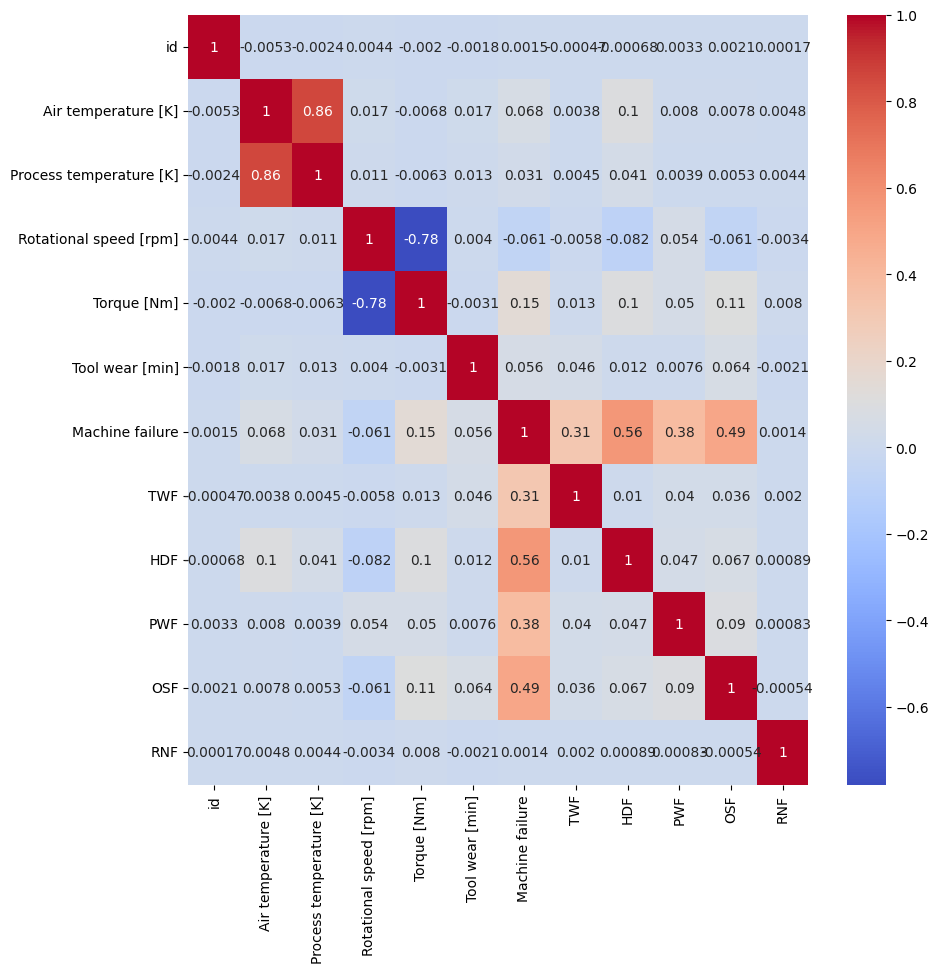

In [28]:
# Correlation Matrix
corr = train_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

* Let's investigate the distribution of the attributes for failures and non-failures:

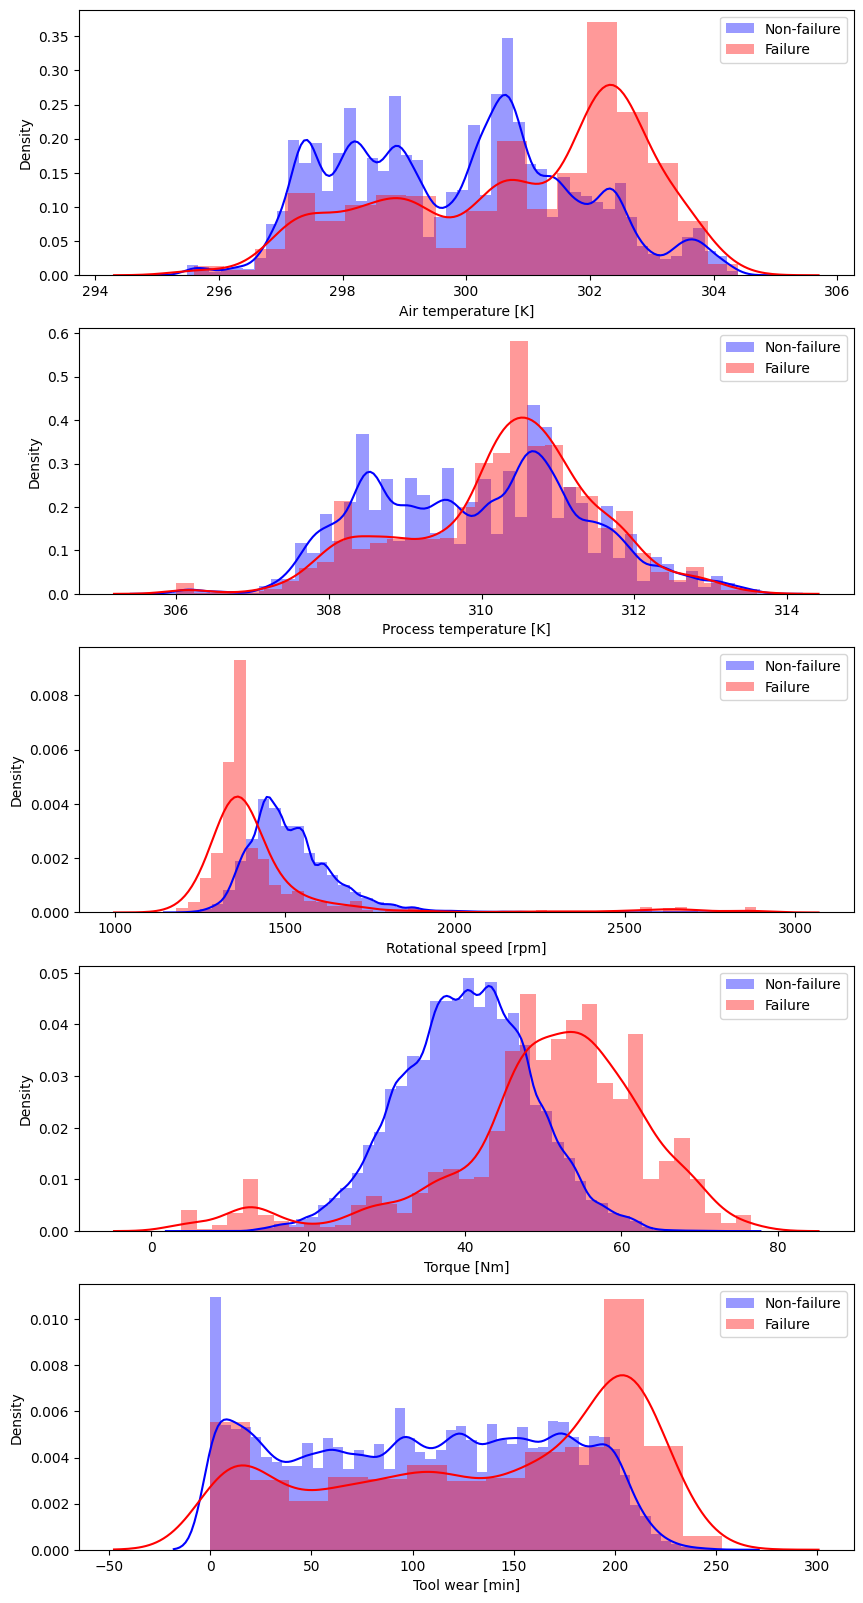

In [29]:
# Plot the distributions of features for machine failure and non-failure
# create a list of features
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
# create a figure with 5 subplots
fig, axes = plt.subplots(5, 1, figsize=(10, 20))
# create a for loop to plot each feature for machine failure and non-failure in a separate subplot
for i in range(len(features)):
    sns.distplot(train_data[features[i]][train_data['Machine failure'] == 0], color="blue", ax=axes[i], label='Non-failure')
    sns.distplot(train_data[features[i]][train_data['Machine failure'] == 1], color="red", ax=axes[i], label='Failure')
    axes[i].legend()
    axes[i].set_xlabel(features[i])
    axes[i].set_ylabel('Density')

* Air temperature: For machine failures the air temperature is more likely to be higher than non-failures.
* Process temperature: Machine failures and non-failures have similar process temperature distributions.
* Rotational speed: Machine failures' rotational speed is more likely to be lower than non-failures'.
* Torque: Machine failures' torque is more likely to be higher than non-failures'.
* Tool wear: Machine failures and non-failures have similar tool wear distributions but failures are more dense around smaller values for tool wear.

* Let's inspect the outliers:

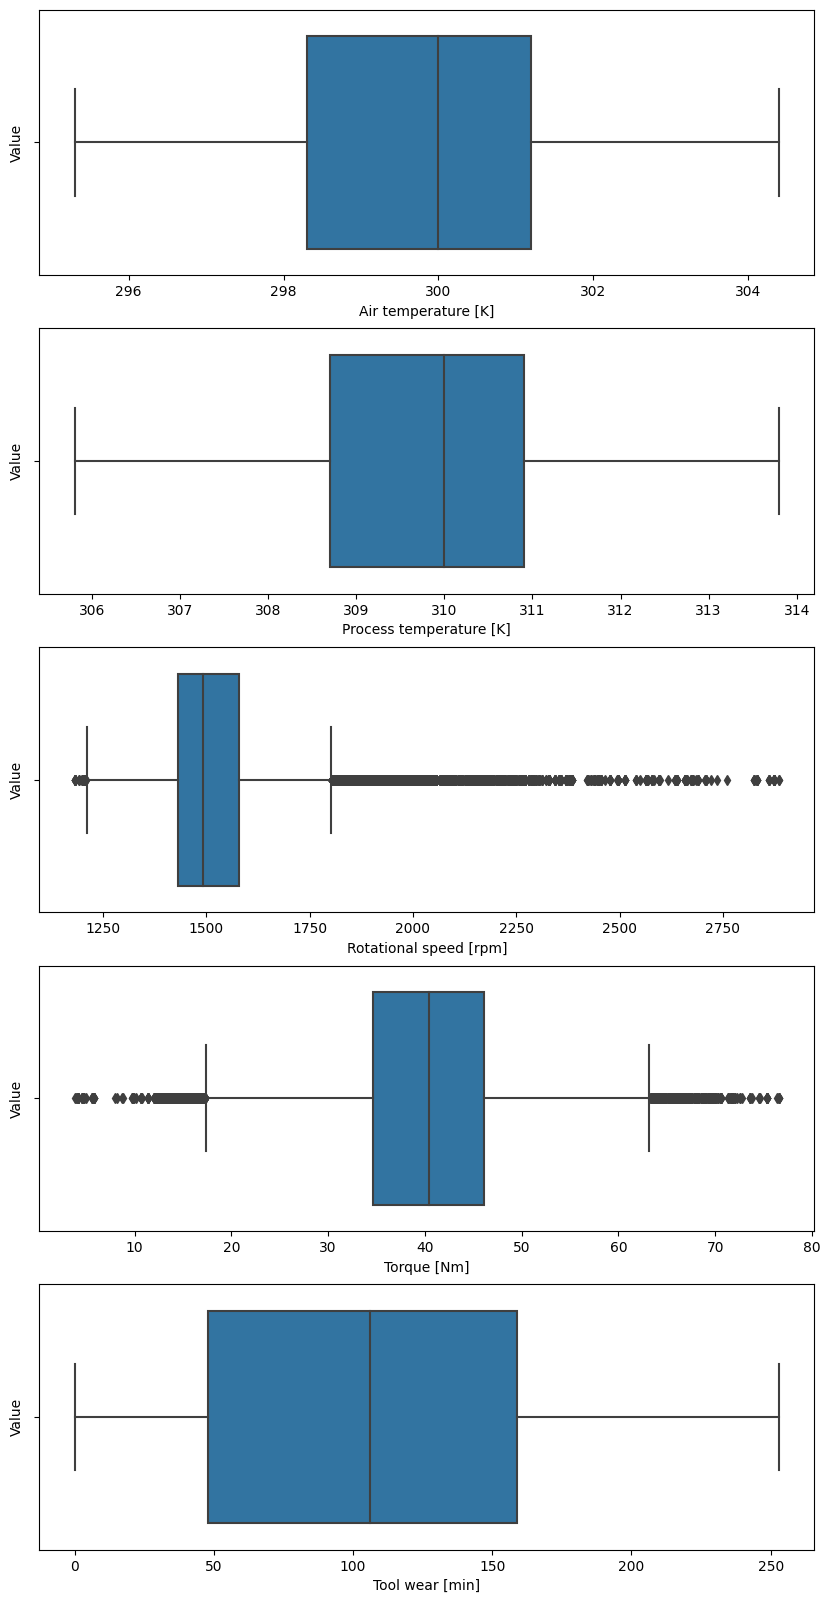

In [30]:
# Plot whisker plots for list features to visualize outliers
fig, axes = plt.subplots(5, 1, figsize=(10, 20))
for i in range(len(features)):
    sns.boxplot(x=train_data[features[i]], ax=axes[i])
    axes[i].set_xlabel(features[i])
    axes[i].set_ylabel('Value')

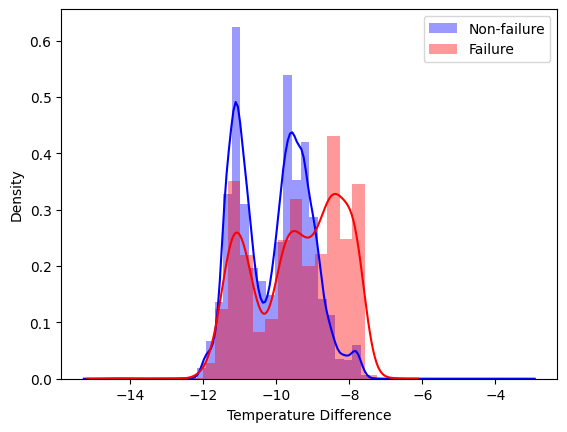

In [31]:
# Invent a new feature : Temperature Difference
train_data['Temperature_Difference'] = train_data['Air temperature [K]'] - train_data['Process temperature [K]']
# Plot the distribution of Temperature Difference for machine failure and non-failure
sns.distplot(train_data['Temperature_Difference'][train_data['Machine failure'] == 0], color="blue", label='Non-failure')
sns.distplot(train_data['Temperature_Difference'][train_data['Machine failure'] == 1], color="red", label='Failure')
plt.legend()
plt.xlabel('Temperature Difference')
plt.ylabel('Density')
plt.show()

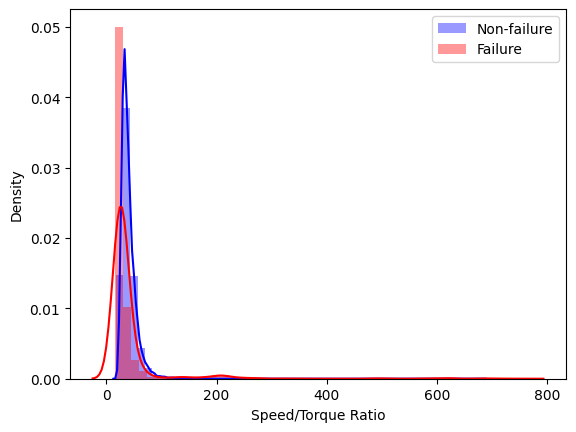

In [32]:
# Invent a new feature : Spped/Torque Ratio
train_data['Speed/Torque_Ratio'] = train_data['Rotational speed [rpm]'] / train_data['Torque [Nm]']
# Plot the distribution of Speed/Torque for machine failure and non-failure
sns.distplot(train_data['Speed/Torque_Ratio'][train_data['Machine failure'] == 0], color="blue", label='Non-failure')
sns.distplot(train_data['Speed/Torque_Ratio'][train_data['Machine failure'] == 1], color="red", label='Failure')
plt.legend()
plt.xlabel('Speed/Torque Ratio')
plt.ylabel('Density')
plt.show()

In [33]:
# doing the same for test data
test_data = pd.read_csv('data/test.csv')
test_data["Temperature_Difference"] = test_data["Air temperature [K]"] - test_data["Process temperature [K]"]
test_data["Speed/Torque_Ratio"] = test_data["Rotational speed [rpm]"] / test_data["Torque [Nm]"]
# save the new test data
test_data.to_csv('data/test_extended.csv', index=False)

In [34]:
# save the new features to a csv file
train_data.to_csv('data/train_extended.csv', index=False)